In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from random import random

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim

In [13]:
from models import ModelManager, ModelType
from utils import MnistData

In [14]:
data = MnistData()

## Training

In [61]:
generator = ModelManager.get_untrained(ModelType.GeneratorConv)
discriminator = ModelManager.get_untrained(ModelType.Discriminator)

In [66]:

discriminator_optimizer = optim.SGD(discriminator.parameters(), lr=1e-5, momentum=True)

batch = 10

# pre-train the discriminator
for epoch in range(200):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.tensor(
        [[1.0 if random() >= 0.5 else 0.0 for _ in range(9)] for _ in range(batch)]
    )
    
    # zero grad
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = - ((1 - batch_of_generated_discrimination).log().sum() / batch) - (batch_of_real_discrimination.log().sum() / batch)
    discriminator_loss.backward()
    discriminator_optimizer.step()
    if epoch % 10 == 0:
        print(f'D--{epoch}:{discriminator_loss.item()}--D')


D--0:0.63447105884552--D
D--10:0.6345421075820923--D
D--20:0.6312353610992432--D
D--30:0.6261781454086304--D
D--40:0.6211372017860413--D
D--50:0.6041423678398132--D
D--60:0.5781855583190918--D
D--70:0.5602210164070129--D
D--80:0.524256706237793--D
D--90:0.48562902212142944--D
D--100:0.45132961869239807--D
D--110:0.3901021480560303--D
D--120:0.33051007986068726--D
D--130:0.26261407136917114--D
D--140:0.22528748214244843--D
D--150:0.15435490012168884--D
D--160:0.11498494446277618--D
D--170:0.06654340773820877--D
D--180:0.031895630061626434--D
D--190:0.1653151661157608--D


---0:D:0.14542317390441895:G:-0.005402649287134409---


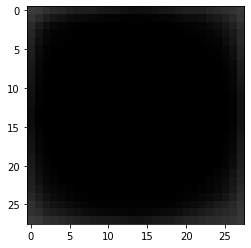

---20:D:0.09039214998483658:G:-0.005418979562819004---


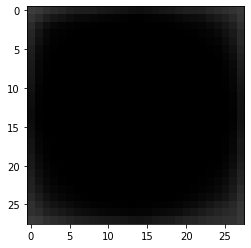

---40:D:0.13407085835933685:G:-0.005430461838841438---


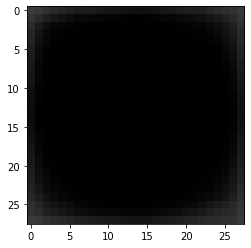

---60:D:0.07870852947235107:G:-0.005441333167254925---


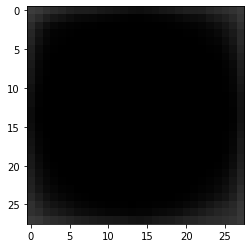

---80:D:0.06862181425094604:G:-0.00545596843585372---


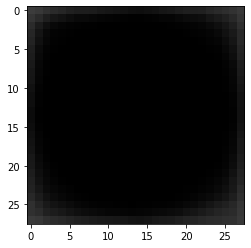

---100:D:0.08247317373752594:G:-0.005466683767735958---


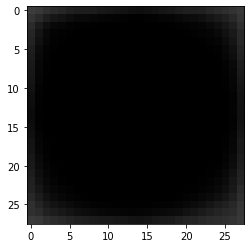

---120:D:0.039630915969610214:G:-0.005480935797095299---


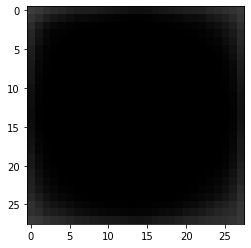

---140:D:0.07909835875034332:G:-0.0054902853444218636---


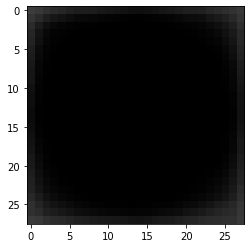

---160:D:0.08345618844032288:G:-0.005503728054463863---


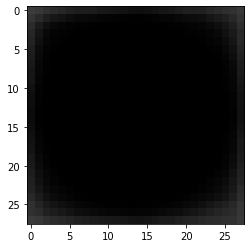

---180:D:0.09550301730632782:G:-0.005516511853784323---


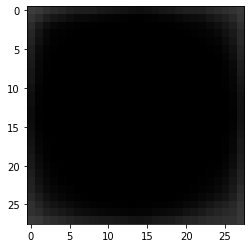

---200:D:0.028326021507382393:G:-0.00552756991237402---


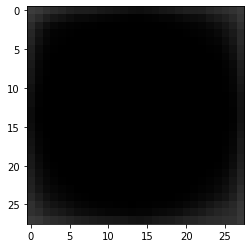

---220:D:0.09427320212125778:G:-0.005543086677789688---


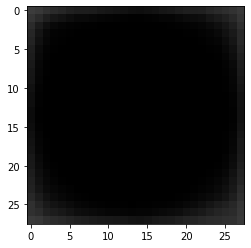

---240:D:0.15907379984855652:G:-0.005556968506425619---


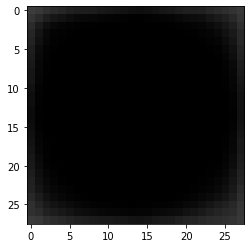

---260:D:0.059789568185806274:G:-0.00556712131947279---


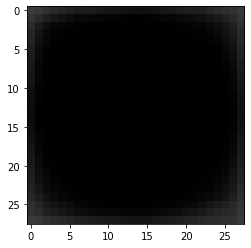

---280:D:0.3415730595588684:G:-0.005579696502536535---


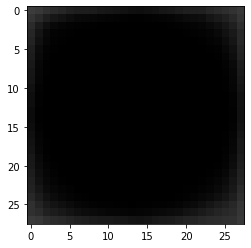

---300:D:0.04159355163574219:G:-0.005593650974333286---


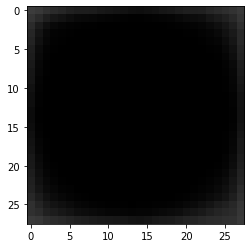

---320:D:0.06498803198337555:G:-0.005608240142464638---


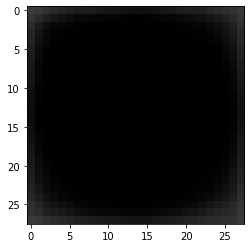

---340:D:0.021734707057476044:G:-0.005620545241981745---


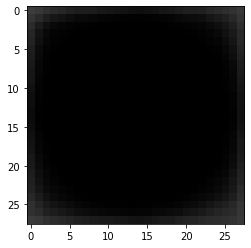

In [67]:

discriminator_optimizer = optim.SGD(discriminator.parameters(), lr=1e-6)
generator_optimizer = optim.SGD(generator.parameters(), lr=1e-4, momentum=True)


for epoch in range(350):
    # sampling
    batch_of_real_data, _ = data.get_training_batch(batch)
    batch_of_noise = torch.tensor(
        [[1.0 if random() >= 0.5 else 0.0 for _ in range(9)] for _ in range(batch)]
    )
    
    # zero grad
    generator_optimizer.zero_grad()
    discriminator_optimizer.zero_grad()

    # predictions
    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)
    batch_of_real_discrimination = discriminator(batch_of_real_data)

    # computing loss
    discriminator_loss = - ((1 - batch_of_generated_discrimination).log().sum() / batch) - (batch_of_real_discrimination.log().sum() / batch)
    discriminator_loss.backward()
    discriminator_optimizer.step()

    batch_of_generated = generator(batch_of_noise)
    batch_of_generated_discrimination = discriminator(batch_of_generated)

    generator_loss = (1 - batch_of_generated_discrimination).log().sum() / batch
    discriminator_optimizer.zero_grad()
    generator_optimizer.zero_grad()
    generator_loss.backward()
    generator_optimizer.step()

    # log
    if epoch % 20 == 0:
        print(f'---{epoch}:D:{discriminator_loss.item()}:G:{generator_loss.item()}---')
        MnistData.display(batch_of_generated[0], scale=True)

## Check

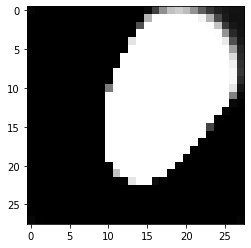

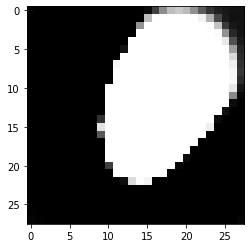

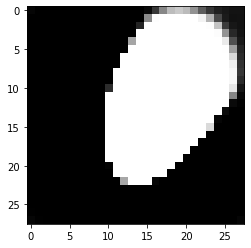

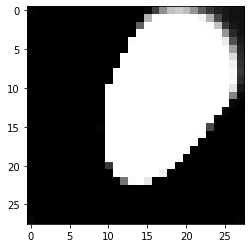

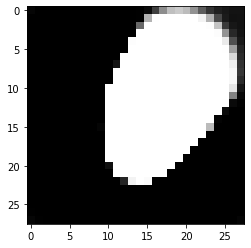

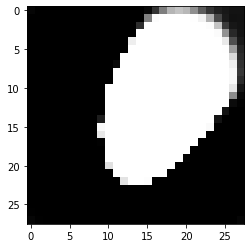

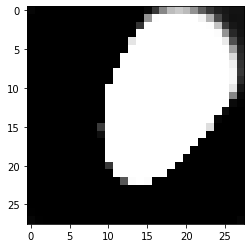

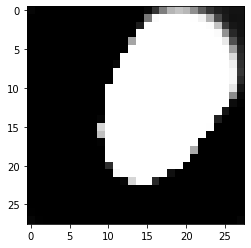

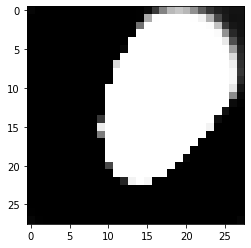

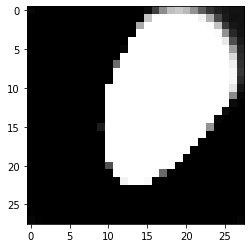

In [58]:
examples = generator(torch.tensor(
        [[1.0 if random() >= 0.5 else 0.0 for _ in range(9)] for _ in range(10)]
))

for i in range(10):
    MnistData.display(examples[i], scale=True)